Problem Statement-
Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC.
You are provided with rental data spanning for 2 years. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
# to show the figures in the jupyter notebook itself
%matplotlib inline 

In [2]:
df = pd.read_csv('train_bikes.csv', parse_dates=['datetime']) # loading the training data

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train =df.copy()
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
import sweetviz as sv

# my_report = sv.analyze(df.drop(['datetime'], axis =1))
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [6]:
df.tail() # looking at the training data from end

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


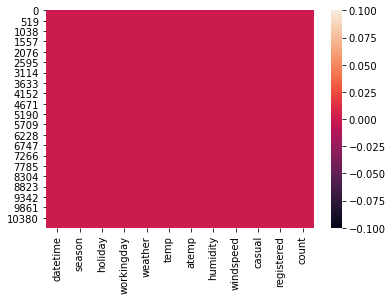

In [7]:
sns.heatmap(df.isnull()) # to check null values

In [8]:
col_names = (df.columns[1:len(df.columns)-1])
col_names

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [9]:
print(col_names[0])
type(col_names[0])

season


str

In [10]:
label_name  = df.columns[len(df.columns)-1]
label_name

'count'

In [11]:
df['year'] = df['datetime'].dt.year # or pd.DatetimeIndex(df['datetime']).year
df['month'] = df.datetime.dt.month # or pd.DatetimeIndex(df['datetime']).month
df['day'] = df['datetime'].dt.day # or pd.DatetimeIndex(df['datetime']).day
df['hour'] = df['datetime'].dt.hour # or pd.DatetimeIndex(df['datetime']).hour
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [12]:
train.head() # not changed when I changed 'df'

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [13]:
df.shape

(10886, 16)

In [14]:
df = df[['year','month', 'hour','season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'windspeed', 'casual', 'registered','count']]
df.head()

,year,month,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011,1,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011,1,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011,1,2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011,1,3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011,1,4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


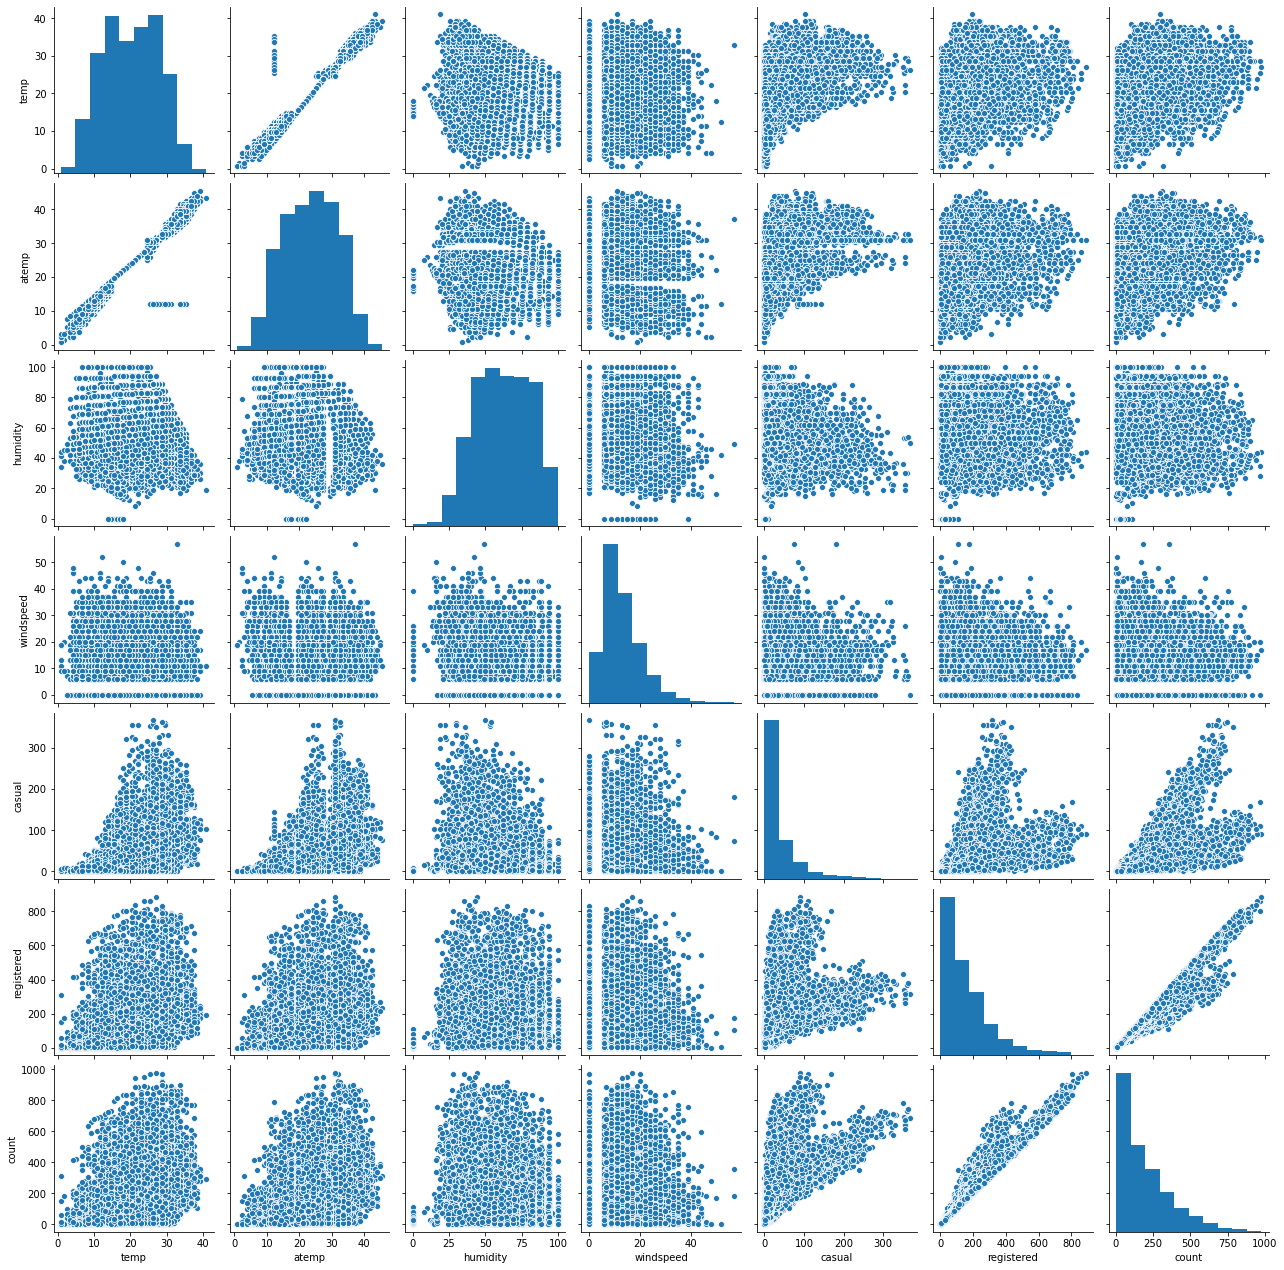

In [30]:
sns.pairplot(data= df.drop(['year','month', 'hour','season','holiday','workingday', 'weather'], axis =1))

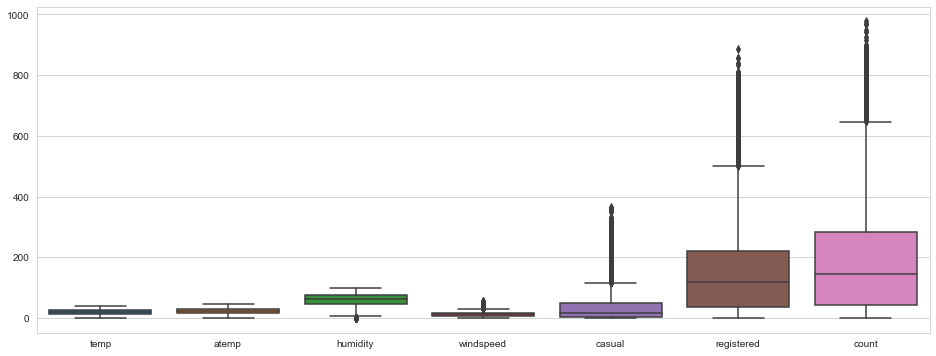

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 6))
sns.boxplot(data=df.drop(['year','month', 'hour','season','holiday','workingday', 'weather'], axis =1))

In [32]:
outlier_columns = ['season', 'holiday', 'workingday', 'weather','temp', 'atemp', 'humidity', 'windspeed', 'casual', 
                   'registered','count']

def outlier_finding():
    for col in outlier_columns:
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        print(col,':')
        print('IQR value of ', col,' is = ',IQR)

        lower_fence = df[col].quantile(0.25) - (IQR*1.5)
        upper_fence = df[col].quantile(0.75) + (IQR*1.5)
        print(f'for normal cases, lower fence = {lower_fence} and upper_fence = {upper_fence}')
       
    # outlier count
        outlier_count = df[(df[col] < lower_fence) | (df[col] > upper_fence)].shape[0]
        print(f'\toutlier count within normal range for {col} is {outlier_count} and its % = {round(outlier_count / df.shape[0]*100, 2)}%\n')
        

    # for extreme values
        lower_fence_extreme = df[col].quantile(0.25) - (IQR*3)
        upper_fence_extreme = df[col].quantile(0.75) + (IQR*3)
        print(f'for extreme cases, lower fence = {lower_fence_extreme} and upper_fence = {upper_fence_extreme}')
        
    # outlier count
        outlier_count_extreme = df[(df[col] < lower_fence_extreme) | 
                                      (df[col] > upper_fence_extreme)].shape[0]
        print(f'\toutlier count within extreme range for {col} is {outlier_count_extreme} and its % = {round(outlier_count_extreme / df.shape[0]*100, 2)}%\n\n')


In [33]:
outlier_finding()

season :
IQR value of  season  is =  2.0
for normal cases, lower fence = -1.0 and upper_fence = 7.0
	outlier count within normal range for season is 0 and its % = 0.0%

for extreme cases, lower fence = -4.0 and upper_fence = 10.0
	outlier count within extreme range for season is 0 and its % = 0.0%


holiday :
IQR value of  holiday  is =  0.0
for normal cases, lower fence = 0.0 and upper_fence = 0.0
	outlier count within normal range for holiday is 311 and its % = 2.86%

for extreme cases, lower fence = 0.0 and upper_fence = 0.0
	outlier count within extreme range for holiday is 311 and its % = 2.86%


workingday :
IQR value of  workingday  is =  1.0
for normal cases, lower fence = -1.5 and upper_fence = 2.5
	outlier count within normal range for workingday is 0 and its % = 0.0%

for extreme cases, lower fence = -3.0 and upper_fence = 4.0
	outlier count within extreme range for workingday is 0 and its % = 0.0%


weather :
IQR value of  weather  is =  1.0
for normal cases, lower fence = 

## Now check the data for hourly and yearly basis

### creating the bar plot based on hour for a given year 

In [34]:
def plot_by_year(dataframe, year):
    if year:
        dataframe = dataframe[dataframe['year']==year]
        
        dataframe = dataframe.groupby(['hour'])['count','workingday'].sum()
        sns.set_style("whitegrid")
        plt.figure(figsize=(15, 5))
        sns.barplot(x=dataframe.index, y = 'count', data=dataframe)

C:\Users\om\anaconda3\envs\machine_learning_updated\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


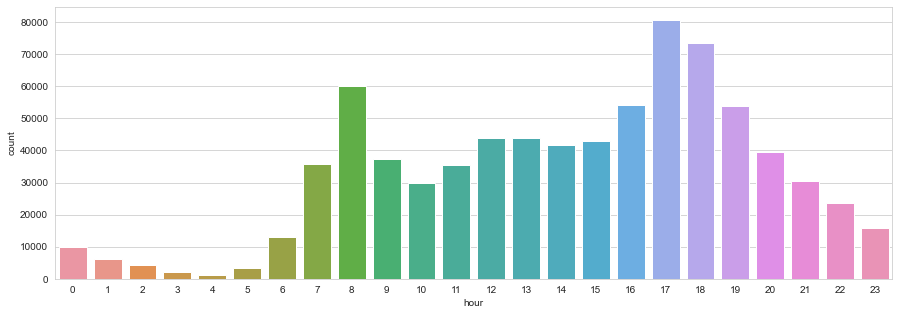

In [35]:
plot_by_year(df,2011)

C:\Users\om\anaconda3\envs\machine_learning_updated\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


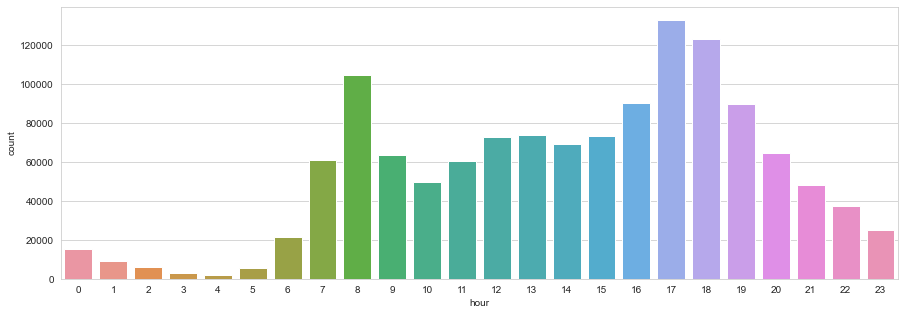

In [36]:
plot_by_year(df,2012)

#### or directly using seaborn w/o using any function

In [37]:
dataframe = df[df['year']==2011]
dataframe = dataframe.groupby(['hour','workingday'])['count'].sum()
dataframe=dataframe.reset_index()
dataframe.head()

,hour,workingday,count
0,0,0,5397
1,0,1,4492
2,1,0,4062
3,1,1,2002
4,2,0,3160


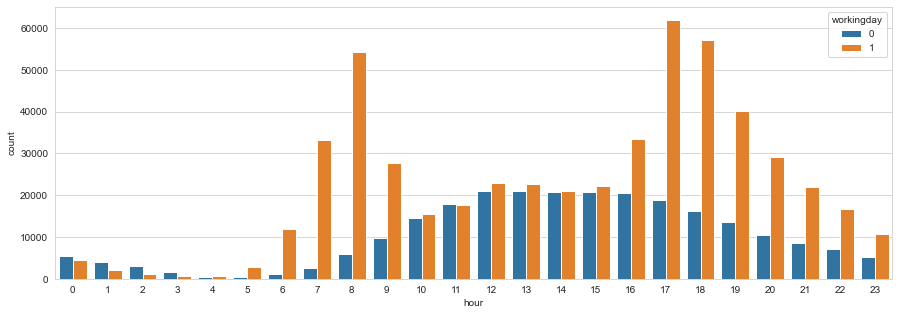

In [38]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))
sns.barplot(x= 'hour', y = 'count', hue='workingday', data=dataframe)

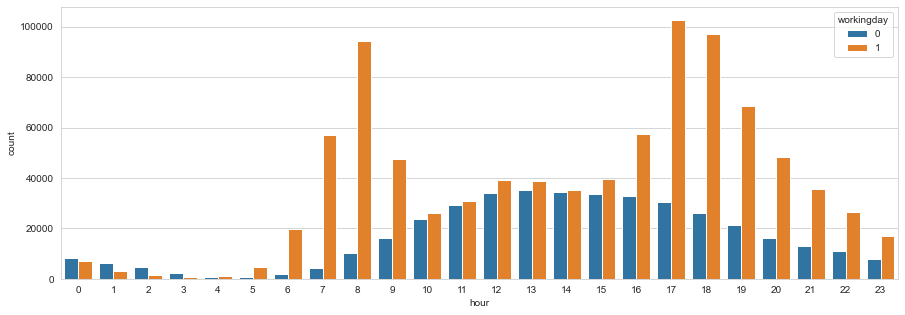

In [39]:
dataframe = df[df['year']==2012].groupby(['hour','workingday'])['count'].sum()
dataframe=dataframe.reset_index()

plt.figure(figsize=(15, 5))
sns.barplot(x= 'hour', y = 'count', hue='workingday', data=dataframe)

## method for creating the count plot based on month  and hour with each case hue = year

In [40]:
df.head()

,year,month,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011,1,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011,1,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011,1,2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011,1,3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011,1,4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


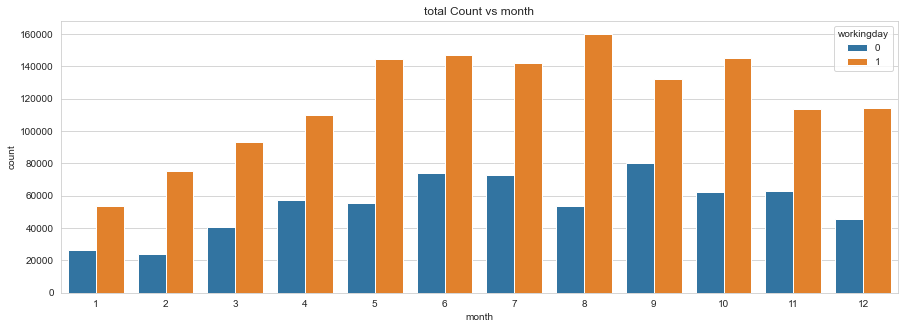

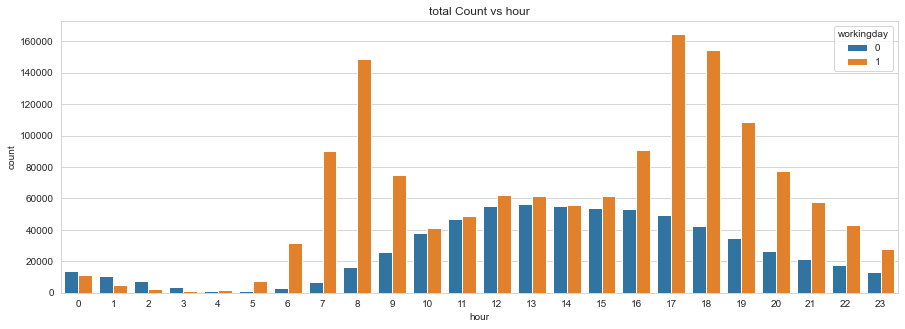

In [41]:
col_name = ['month','hour']
for col in col_name:
    dataframe = df.groupby([col,'workingday'])['count'].sum().reset_index()
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x= "{0}".format(col), y = 'count', hue='workingday', data=dataframe)
    ax.set(title="total Count vs {0}".format(col))

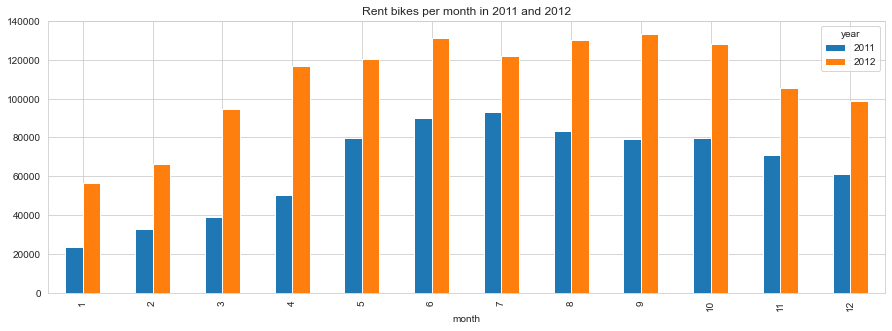

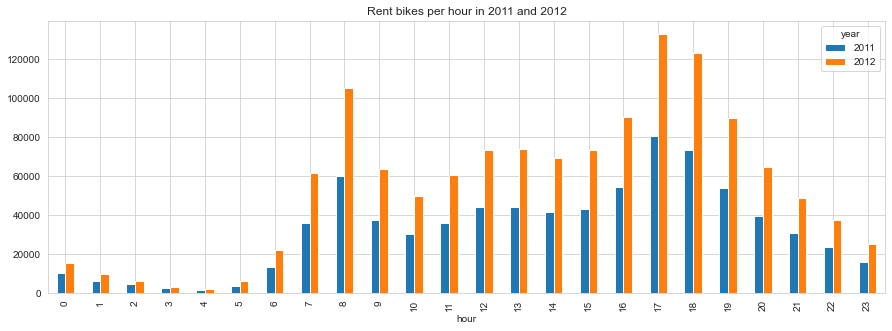

In [42]:
def plot_by_year(agg_attr, title):
    dataframe = df.groupby([agg_attr, 'year'])['count'].agg('sum').unstack() # groupby year
    return dataframe.plot(kind='bar', figsize=(15,5), title=title) # returning the figure grouped by year


plot_by_year('month', "Rent bikes per month in 2011 and 2012") # plotting monthly bike rentals based on year
plot_by_year('hour', "Rent bikes per hour in 2011 and 2012") # plotting hourls bike rentals based  on year


## method to plot a boxplot between count and hour for each year seperately

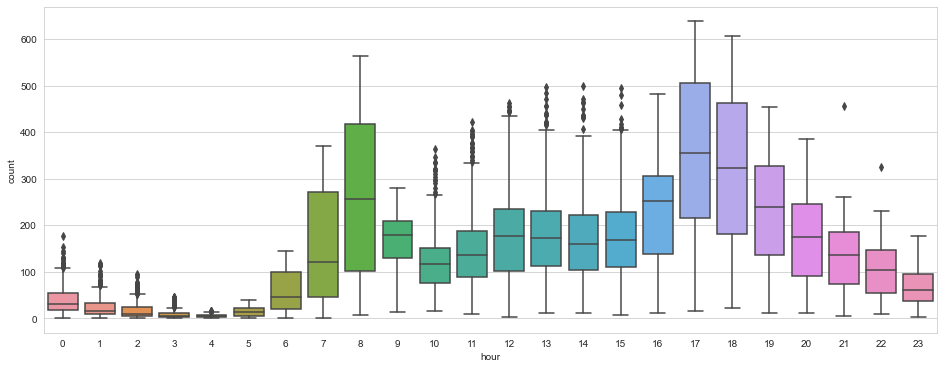

In [43]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 6))
sns.boxplot(x = 'hour',y = 'count', data = df[df['year']==2011]) 

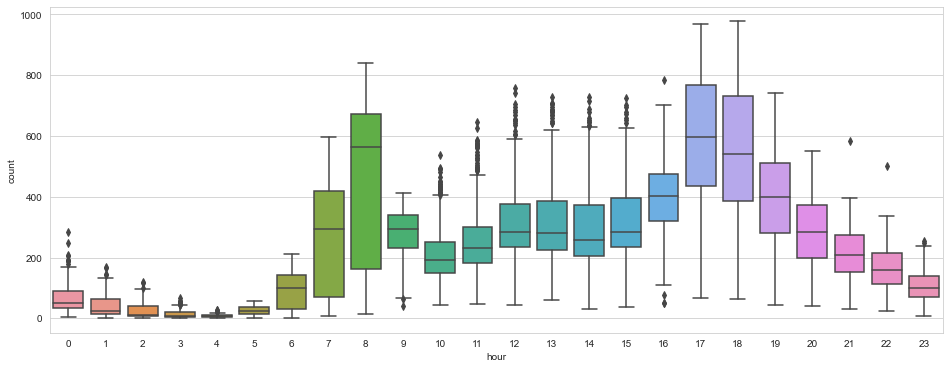

In [44]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 6))
sns.boxplot(x = 'hour',y = 'count', data = df[df['year']==2012]) 

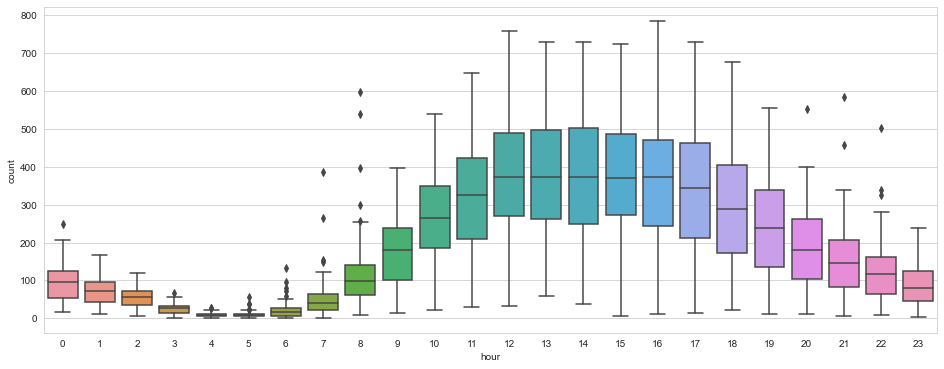

In [45]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 6))
sns.boxplot(x = 'hour', y = 'count', data = df[df['workingday']==0])

[Text(0.5, 1.0, 'Boxplot for cycle count per hour')]

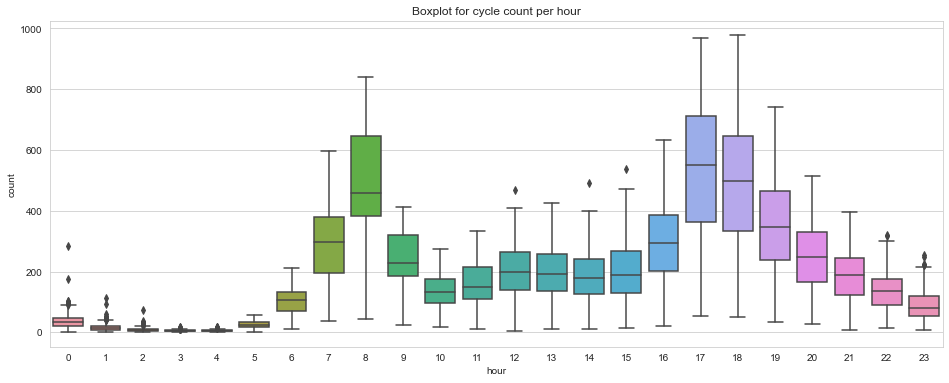

In [46]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x = 'hour', y = 'count', data = df[df['workingday']==1])
ax.set(title = 'Boxplot for cycle count per hour')

In [47]:

train.info() # observing the data types of the columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [15]:
train.head() # Generate descriptive statistics that summarize the central tendency,dispersion and shape of a dataset's distribution

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [16]:
test = pd.read_csv('test_bikes.csv') # loading the test data
test.head()  # test dat has 3 less columns i.e "casual, registered and count"

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [17]:
test = pd.read_csv('test_bikes.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [18]:
test.info() # observing the data types of the columns for test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [19]:
test.describe() # Generate descriptive statistics that summarize the central tendency,dispersion and shape of a dataset's distribution for test data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [20]:
print("Are there missing values: ", train.isnull().values.any()) # printing if dataset has any NaN value

Are there missing values:  False


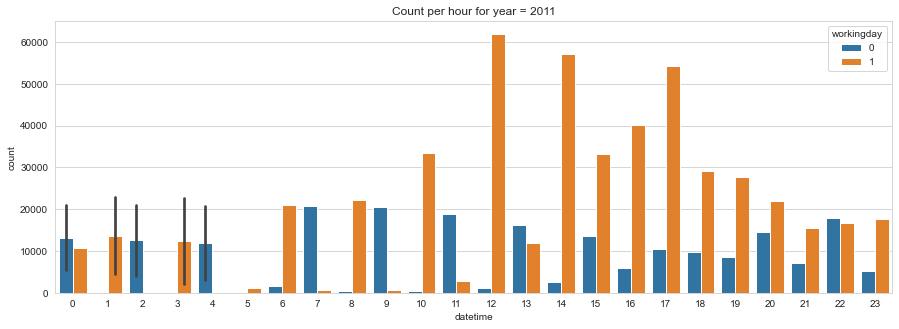

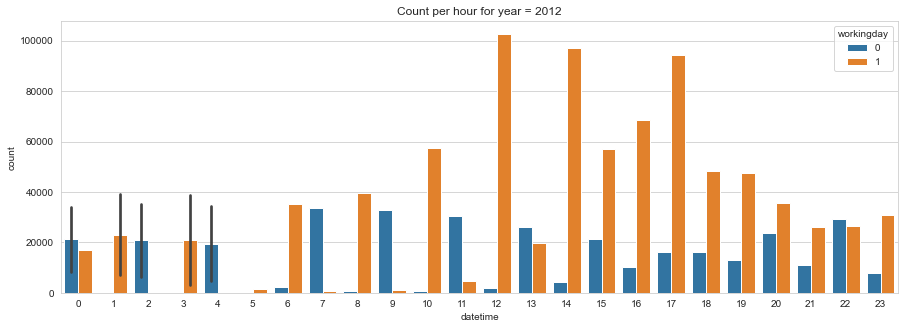

In [59]:
for yr in train.datetime.dt.year.unique():
    dataframe = train[train.datetime.dt.year == yr].groupby([train.datetime.dt.hour, 'workingday'])['count'].sum()
    dataframe = dataframe.reset_index()
    
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x= train.datetime.dt.hour, y = 'count', hue='workingday', data=dataframe)
    ax.set(title = 'Count per hour for year = {0}'.format(yr))

C:\Users\om\anaconda3\envs\machine_learning_updated\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\om\anaconda3\envs\machine_learning_updated\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


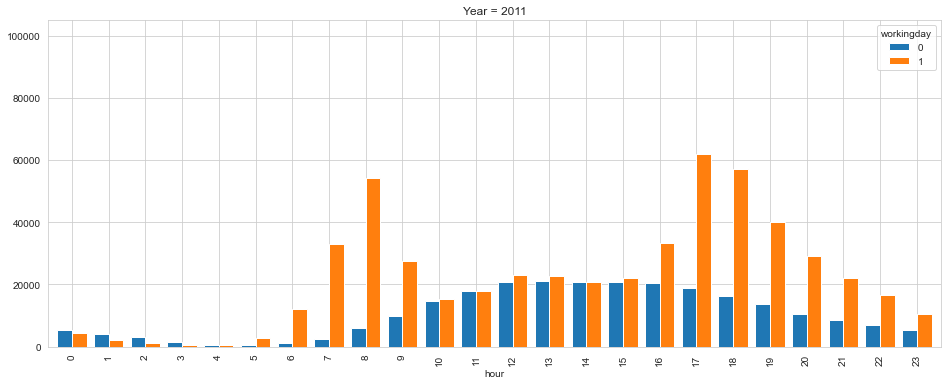

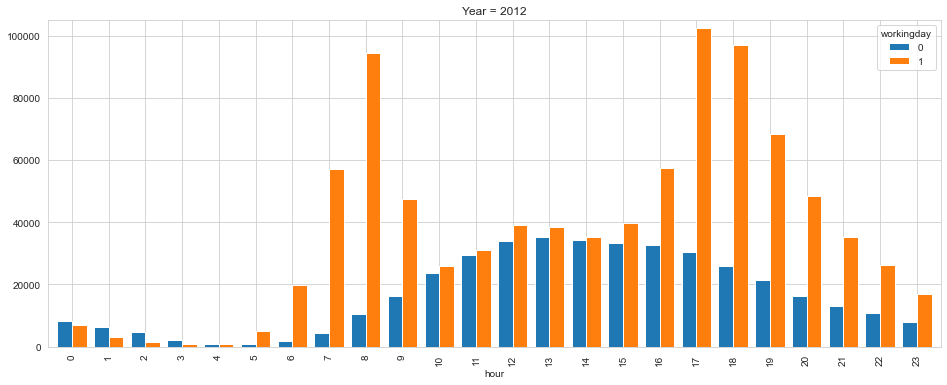

In [63]:
# method for creating the count plot based on hour for a given year 
def plot_by_hour(data, year=None, agg='sum'):
    if year: 
        data = data[data.datetime.dt.year == year]
    data.loc[:, ('hour')] = data.datetime.dt.hour # extracting the hour data if the year in the data is equal to the year passed as argument
    
    by_hour_df = data.groupby(['hour', 'workingday'])['count'].agg(agg).unstack() # groupby hour and working day
    return by_hour_df.plot(kind='bar', ylim=(0, 105000), figsize=(16,6), width=0.8, title="Year = {0}".format(year)) # returning the figure grouped by hour


plot_by_hour(train, year=2011) # plotting the count plot based on hour for 2011 
plot_by_hour(train, year=2012) # plotting the count plot based on hour for 2012

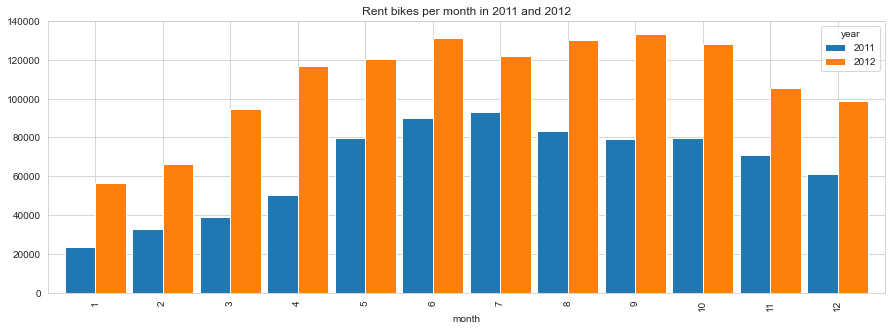

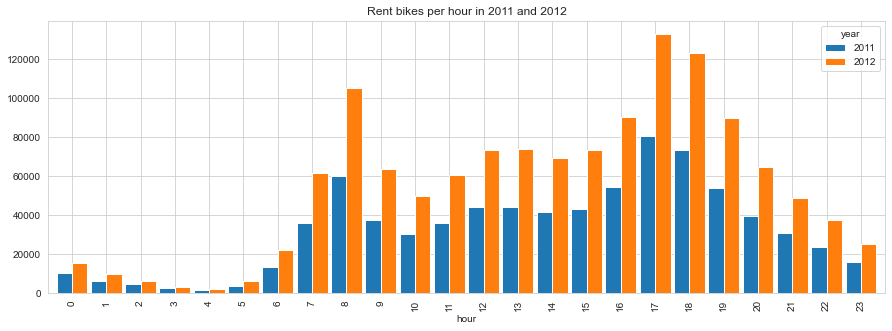

In [66]:
# method for creating the count plot based on year 
def plot_by_year(agg_attr, title):
    # extracting the required fields
    dd = train.copy()
    
    dd['year'] = train.datetime.dt.year # extratcing the year
    dd['month'] = train.datetime.dt.month # extratcing the month
    dd['hour'] = train.datetime.dt.hour # extratcing the hour
 
    
    by_year = dd.groupby([agg_attr, 'year'])['count'].agg('sum').unstack() # groupby year
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title) # returning the figure grouped by year


plot_by_year('month', "Rent bikes per month in 2011 and 2012") # plotting monthly bike rentals based on year
plot_by_year('hour', "Rent bikes per hour in 2011 and 2012") # plotting hourls bike rentals based  on year


In [67]:
# method to plot a graph for count per hour
def plot_hours(data, message = ''):
    dd = data.copy()
    dd['hour'] = data.datetime.dt.hour # extratcing the hour
    
    hours = {}
    for hour in range(24):
        hours[hour] = dd[ dd.hour == hour ]['count'].values

    plt.figure(figsize=(15,5))
    plt.ylabel("Count rent")
    plt.xlabel("Hours")
    plt.title("count vs hours\n" + message)
    plt.boxplot( [hours[hour] for hour in range(24)] )
    
    axis = plt.gca()
    axis.set_ylim([1, 1100])
 

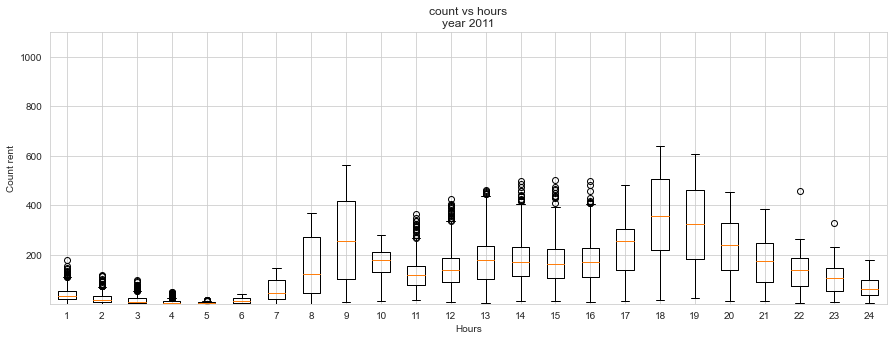

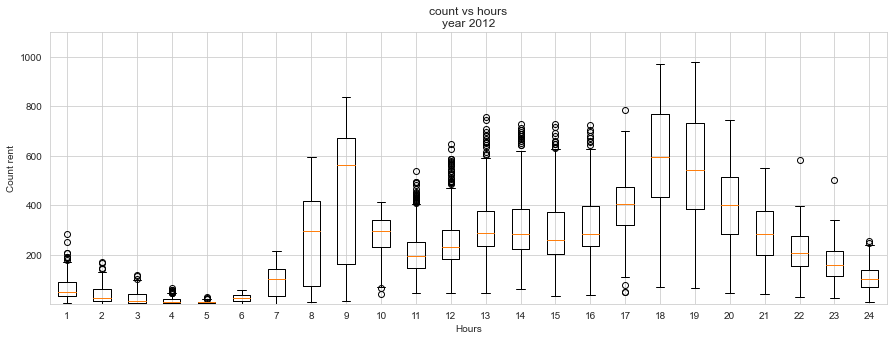

In [68]:
plot_hours( train[train.datetime.dt.year == 2011], 'year 2011') # box plot for hourly count for the mentioned year
plot_hours( train[train.datetime.dt.year == 2012], 'year 2012') # box plot for hourly count for the mentioned year

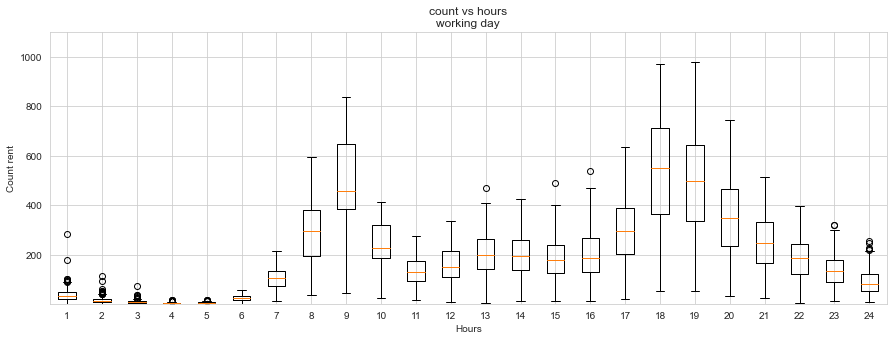

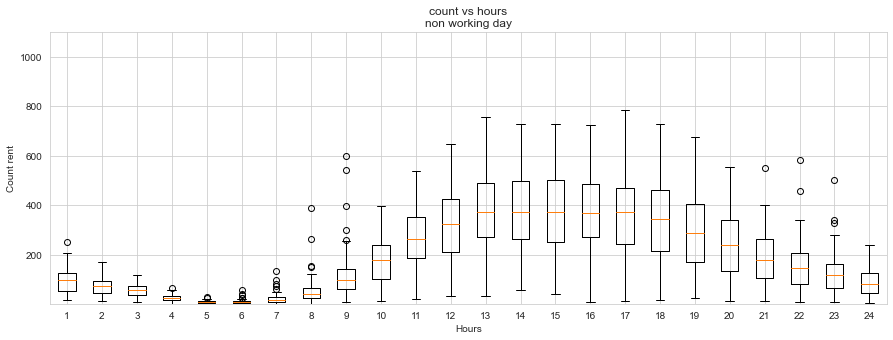

In [69]:

plot_hours( train[train.workingday == 1], 'working day') # plotting hourly count of rented bikes for working days for a given year
plot_hours( train[train.workingday == 0], 'non working day') # plotting hourly count of rented bikes for non-working days for a given year

In [22]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [23]:
dt_train = pd.to_datetime(train["datetime"]) # converting the column to datetime for train dataset
train["hour"] = dt_train.map(lambda x: x.hour) # adding the hour column for train dataset
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [24]:
dt_test = pd.to_datetime(test["datetime"]) # converting the column to datetime for test dataset
test["hour"] = dt_test.map(lambda x: x.hour) # adding the hour column for test dataset
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4


In [25]:
# method to convert categorical data to numerical data
def categorical_to_numeric(x):
    if 0 <=  x < 6:
        return 0
    elif 6 <= x < 13:
        return 1
    elif 13 <= x < 19:
        return 2
    elif 19 <= x < 24:
        return 3

In [26]:
train['hour'] = train['hour'].apply(categorical_to_numeric)# applying the above conversion logic to training data
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0


In [27]:
test['hour'] = test['hour'].apply(categorical_to_numeric) # applying the above conversion logic to test data
test.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,0


In [28]:
# drop unnecessary columns

train = train.drop(['datetime'], axis=1)
test = test.drop(['datetime'], axis=1)

In [29]:
X = train.drop(['casual', 'registered', 'count'], axis = 1)
y= train['count']

In [176]:
 X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,1,0,0,1,9.84,14.395,81,0.0,0
1,1,0,0,1,9.02,13.635,80,0.0,0
2,1,0,0,1,9.02,13.635,80,0.0,0
3,1,0,0,1,9.84,14.395,75,0.0,0
4,1,0,0,1,9.84,14.395,75,0.0,0


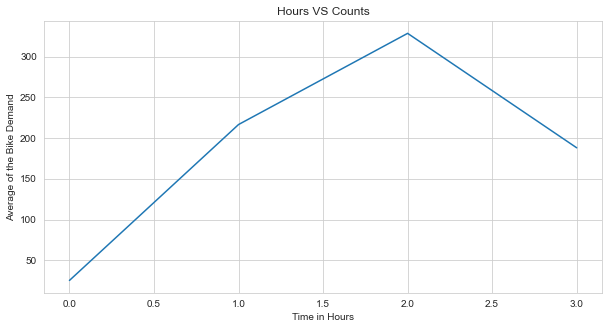

In [79]:
# an Hour bs Count Graph depicting average bike demand based on the hour 
figure,axes = plt.subplots(figsize = (10, 5))
hours = train.groupby(["hour"]).agg("mean")["count"]  
hours.plot(kind="line", ax=axes) 
plt.title('Hours VS Counts')
axes.set_xlabel('Time in Hours')
axes.set_ylabel('Average of the Bike Demand')
plt.show()

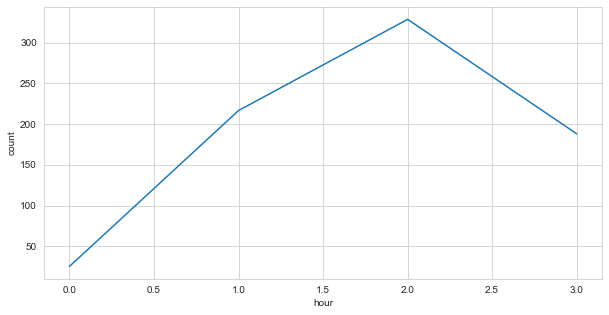

In [80]:
df_hours = train.groupby(["hour"]).agg("mean")["count"].reset_index()
figure,axes = plt.subplots(figsize = (10, 5))
sns.lineplot(x= 'hour', y = 'count', data = df_hours)

In [81]:
# count based on holiday
a = train.groupby('holiday')[['count']].mean()


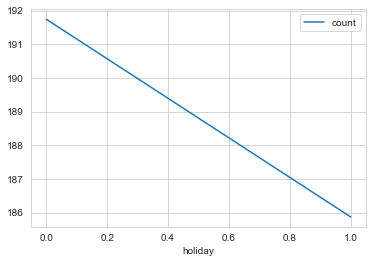

In [82]:
a.plot()
plt.show()

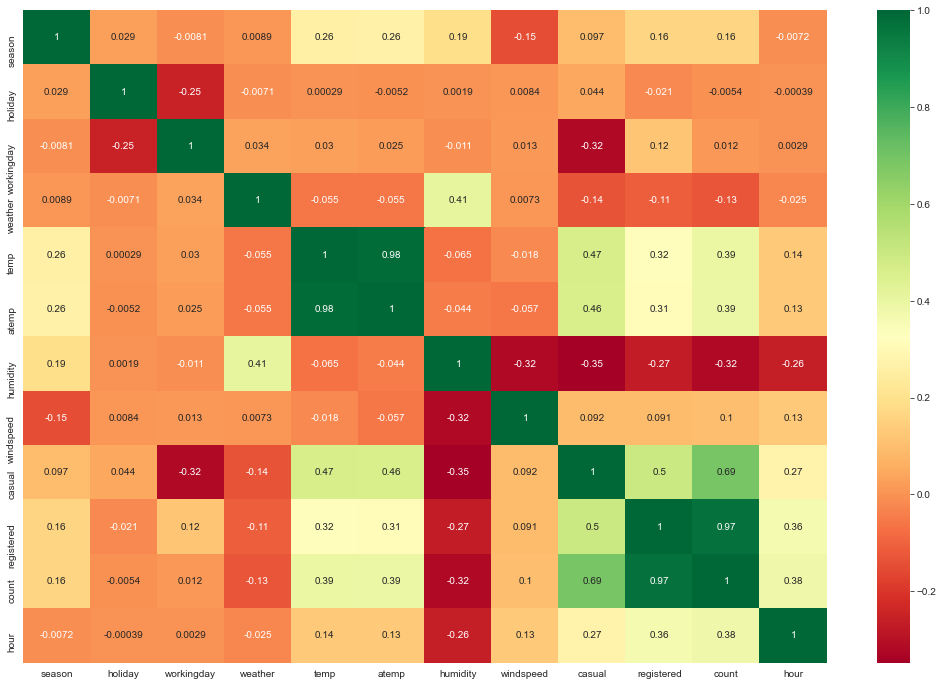

In [83]:
#get correlations of each features in dataset
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(18,12))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<pre>
train = train.drop(['datetime'], axis=1)
test = test.drop(['datetime'], axis=1)

X = train.drop(['casual', 'registered', 'count'], axis = 1)
y= train['count']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [33]:
from catboost import CatBoostRegressor # got this from pycaret

In [34]:
cb = CatBoostRegressor()

In [35]:
cb.fit(X_train,y_train)

0:	learn: 178.8531492	total: 218ms	remaining: 3m 37s
1:	learn: 176.4896953	total: 231ms	remaining: 1m 55s
2:	learn: 174.0697151	total: 244ms	remaining: 1m 21s
3:	learn: 171.9301413	total: 256ms	remaining: 1m 3s
4:	learn: 169.7968089	total: 264ms	remaining: 52.6s
5:	learn: 167.6629527	total: 271ms	remaining: 44.8s
6:	learn: 165.8789050	total: 276ms	remaining: 39.2s
7:	learn: 163.9528983	total: 283ms	remaining: 35.1s
8:	learn: 162.2651961	total: 289ms	remaining: 31.8s
9:	learn: 160.6703601	total: 296ms	remaining: 29.4s
10:	learn: 158.9994863	total: 303ms	remaining: 27.3s
11:	learn: 157.5093702	total: 310ms	remaining: 25.6s
12:	learn: 155.8864445	total: 317ms	remaining: 24.1s
13:	learn: 154.4811546	total: 323ms	remaining: 22.8s
14:	learn: 153.1275626	total: 329ms	remaining: 21.6s
15:	learn: 151.9079993	total: 336ms	remaining: 20.7s
16:	learn: 150.7836077	total: 343ms	remaining: 19.8s
17:	learn: 149.6034055	total: 349ms	remaining: 19s
18:	learn: 148.3874828	total: 355ms	remaining: 18.3s
19

164:	learn: 119.1289502	total: 1.5s	remaining: 7.58s
165:	learn: 119.0794285	total: 1.5s	remaining: 7.56s
166:	learn: 119.0659616	total: 1.51s	remaining: 7.54s
167:	learn: 119.0405879	total: 1.52s	remaining: 7.54s
168:	learn: 119.0216806	total: 1.53s	remaining: 7.52s
169:	learn: 118.9750664	total: 1.53s	remaining: 7.49s
170:	learn: 118.9441347	total: 1.54s	remaining: 7.48s
171:	learn: 118.9230923	total: 1.56s	remaining: 7.49s
172:	learn: 118.9123562	total: 1.56s	remaining: 7.47s
173:	learn: 118.8917504	total: 1.57s	remaining: 7.45s
174:	learn: 118.8532262	total: 1.57s	remaining: 7.43s
175:	learn: 118.8302362	total: 1.58s	remaining: 7.41s
176:	learn: 118.8085108	total: 1.59s	remaining: 7.38s
177:	learn: 118.7887638	total: 1.59s	remaining: 7.36s
178:	learn: 118.7473339	total: 1.6s	remaining: 7.35s
179:	learn: 118.7183618	total: 1.61s	remaining: 7.34s
180:	learn: 118.7001821	total: 1.62s	remaining: 7.34s
181:	learn: 118.6715682	total: 1.63s	remaining: 7.32s
182:	learn: 118.6600250	total: 

330:	learn: 115.3669242	total: 2.89s	remaining: 5.85s
331:	learn: 115.3592976	total: 2.9s	remaining: 5.83s
332:	learn: 115.3400232	total: 2.91s	remaining: 5.82s
333:	learn: 115.3273677	total: 2.91s	remaining: 5.81s
334:	learn: 115.3194912	total: 2.92s	remaining: 5.8s
335:	learn: 115.3002459	total: 2.93s	remaining: 5.78s
336:	learn: 115.2874171	total: 2.93s	remaining: 5.77s
337:	learn: 115.2737367	total: 2.94s	remaining: 5.75s
338:	learn: 115.2597606	total: 2.94s	remaining: 5.74s
339:	learn: 115.2359569	total: 2.95s	remaining: 5.73s
340:	learn: 115.2062995	total: 2.96s	remaining: 5.72s
341:	learn: 115.1870540	total: 2.96s	remaining: 5.71s
342:	learn: 115.1696285	total: 2.97s	remaining: 5.69s
343:	learn: 115.1573650	total: 2.98s	remaining: 5.68s
344:	learn: 115.1405045	total: 2.98s	remaining: 5.67s
345:	learn: 115.1146732	total: 2.99s	remaining: 5.65s
346:	learn: 115.0969545	total: 3s	remaining: 5.64s
347:	learn: 115.0731821	total: 3s	remaining: 5.63s
348:	learn: 115.0498621	total: 3.01s

493:	learn: 112.8166251	total: 4.16s	remaining: 4.26s
494:	learn: 112.7963864	total: 4.18s	remaining: 4.26s
495:	learn: 112.7837881	total: 4.18s	remaining: 4.25s
496:	learn: 112.7683581	total: 4.19s	remaining: 4.24s
497:	learn: 112.7559928	total: 4.2s	remaining: 4.23s
498:	learn: 112.7487892	total: 4.21s	remaining: 4.23s
499:	learn: 112.7300449	total: 4.22s	remaining: 4.22s
500:	learn: 112.7202770	total: 4.23s	remaining: 4.21s
501:	learn: 112.7033410	total: 4.23s	remaining: 4.2s
502:	learn: 112.6933580	total: 4.24s	remaining: 4.19s
503:	learn: 112.6818072	total: 4.25s	remaining: 4.18s
504:	learn: 112.6603403	total: 4.25s	remaining: 4.17s
505:	learn: 112.6452582	total: 4.26s	remaining: 4.16s
506:	learn: 112.6256210	total: 4.26s	remaining: 4.15s
507:	learn: 112.6047463	total: 4.28s	remaining: 4.14s
508:	learn: 112.5998305	total: 4.28s	remaining: 4.13s
509:	learn: 112.5982714	total: 4.29s	remaining: 4.12s
510:	learn: 112.5933416	total: 4.29s	remaining: 4.11s
511:	learn: 112.5778309	total:

652:	learn: 110.9090854	total: 5.26s	remaining: 2.8s
653:	learn: 110.9065950	total: 5.27s	remaining: 2.79s
654:	learn: 110.8967300	total: 5.28s	remaining: 2.78s
655:	learn: 110.8813154	total: 5.29s	remaining: 2.77s
656:	learn: 110.8643905	total: 5.3s	remaining: 2.77s
657:	learn: 110.8562696	total: 5.31s	remaining: 2.76s
658:	learn: 110.8483213	total: 5.32s	remaining: 2.75s
659:	learn: 110.8297769	total: 5.33s	remaining: 2.74s
660:	learn: 110.8073434	total: 5.34s	remaining: 2.74s
661:	learn: 110.7901452	total: 5.34s	remaining: 2.73s
662:	learn: 110.7705691	total: 5.35s	remaining: 2.72s
663:	learn: 110.7561839	total: 5.36s	remaining: 2.71s
664:	learn: 110.7446959	total: 5.37s	remaining: 2.7s
665:	learn: 110.7366417	total: 5.37s	remaining: 2.69s
666:	learn: 110.7176960	total: 5.38s	remaining: 2.69s
667:	learn: 110.7096301	total: 5.38s	remaining: 2.68s
668:	learn: 110.7043722	total: 5.4s	remaining: 2.67s
669:	learn: 110.6966627	total: 5.4s	remaining: 2.66s
670:	learn: 110.6885463	total: 5.

820:	learn: 109.2285934	total: 6.61s	remaining: 1.44s
821:	learn: 109.2198141	total: 6.62s	remaining: 1.43s
822:	learn: 109.2115992	total: 6.62s	remaining: 1.42s
823:	learn: 109.1994058	total: 6.63s	remaining: 1.42s
824:	learn: 109.1848587	total: 6.64s	remaining: 1.41s
825:	learn: 109.1729536	total: 6.64s	remaining: 1.4s
826:	learn: 109.1576815	total: 6.65s	remaining: 1.39s
827:	learn: 109.1570196	total: 6.66s	remaining: 1.38s
828:	learn: 109.1560149	total: 6.66s	remaining: 1.37s
829:	learn: 109.1448870	total: 6.67s	remaining: 1.37s
830:	learn: 109.1324246	total: 6.68s	remaining: 1.36s
831:	learn: 109.1320837	total: 6.68s	remaining: 1.35s
832:	learn: 109.1210457	total: 6.69s	remaining: 1.34s
833:	learn: 109.1126457	total: 6.7s	remaining: 1.33s
834:	learn: 109.1005856	total: 6.71s	remaining: 1.33s
835:	learn: 109.0892432	total: 6.72s	remaining: 1.32s
836:	learn: 109.0764513	total: 6.72s	remaining: 1.31s
837:	learn: 109.0670024	total: 6.73s	remaining: 1.3s
838:	learn: 109.0603976	total: 

983:	learn: 107.7946930	total: 7.88s	remaining: 128ms
984:	learn: 107.7853693	total: 7.89s	remaining: 120ms
985:	learn: 107.7802091	total: 7.9s	remaining: 112ms
986:	learn: 107.7797421	total: 7.9s	remaining: 104ms
987:	learn: 107.7788990	total: 7.91s	remaining: 96.1ms
988:	learn: 107.7704415	total: 7.92s	remaining: 88ms
989:	learn: 107.7702125	total: 7.93s	remaining: 80.1ms
990:	learn: 107.7546062	total: 7.94s	remaining: 72.1ms
991:	learn: 107.7465274	total: 7.95s	remaining: 64.1ms
992:	learn: 107.7420069	total: 7.95s	remaining: 56.1ms
993:	learn: 107.7353862	total: 7.96s	remaining: 48.1ms
994:	learn: 107.7302915	total: 7.97s	remaining: 40.1ms
995:	learn: 107.7196802	total: 7.98s	remaining: 32ms
996:	learn: 107.7117091	total: 7.98s	remaining: 24ms
997:	learn: 107.6999255	total: 7.99s	remaining: 16ms
998:	learn: 107.6991112	total: 8s	remaining: 8.01ms
999:	learn: 107.6935598	total: 8s	remaining: 0us


In [36]:
predictions = cb.predict(X_test)
predictions

array([244.05366008,  65.84801969, 227.69436073, ...,  46.21423285,
        15.85097677,  42.28736399])

#### as all the below operations are already applied to test
<pre>
test = pd.read_csv('test_bikes.csv', parse_dates=['datetime'])

dt_test = pd.to_datetime(test["datetime"]) # converting the column to datetime for test dataset
test["hour"] = dt_test.map(lambda x: x.hour) # a

test['hour'] = test['hour'].apply(categorical_to_numeric) # applying the above conversion logic to test data

test = test.drop(['datetime'], axis=1)

In [37]:
result=cb.predict(test) # as test = pd.resd_csv(train_bikes.csv)
result

array([19.00826185, 12.05321131, 12.05321131, ..., 81.28092645,
       83.50451045, 70.05115229])

In [38]:
result.shape

(6493,)

In [39]:
cb.score(X_train, y_train)

0.6471540597791979

In [40]:
cb.score(X_test, y_test)

0.5824769412635764

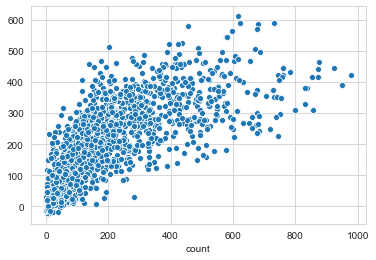

In [183]:
sns.scatterplot(y_test,predictions) # if graph is normally distributed then it is a good result

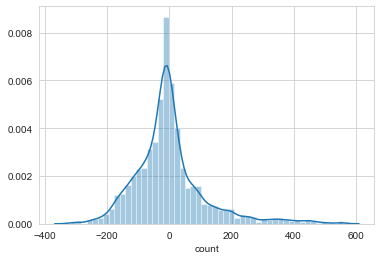

In [186]:
sns.distplot(y_test-predictions)  # if graph is normally distributed then it is a good result

### Evaluation Metrices

In [41]:
from sklearn import metrics

In [42]:
print('MAE: ',metrics.mean_absolute_error(y_test, predictions))
print('MSE: ',metrics.mean_squared_error(y_test, predictions))
print('RMSE: ',np.sqrt(metrics.mean_absolute_error(y_test, predictions)))

MAE:  78.55011950574306
MSE:  13553.119544305548
RMSE:  8.862850529358095


### saving the model

In [43]:
from sklearn.externals import joblib  

# Save the model
joblib.dump(cb, 'joblib_catboost_bikes.pkl')



C:\Users\om\anaconda3\envs\machine_learning_updated\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['joblib_catboost_bikes.pkl']

### Loading the model

In [210]:
# Load the model
model_loaded= joblib.load('catboost_bikes.pkl')

In [211]:
result = model_loaded.predict(test)
result

array([19.00826185, 12.05321131, 12.05321131, ..., 81.28092645,
       83.50451045, 70.05115229])

In [45]:
X.columns # this should be the format of data inputs for prediction at backend

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'hour'],
      dtype='object')

## Checking best model using Pycaret

#### used the pycaret to best the best model with best hypertunning parameters

In [149]:
# Importing module and initializing setup
from pycaret.regression import *

In [150]:
X['count'] = train['count']
X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,count
0,1,0,0,1,9.84,14.395,81,0.0,0,16
1,1,0,0,1,9.02,13.635,80,0.0,0,40
2,1,0,0,1,9.02,13.635,80,0.0,0,32
3,1,0,0,1,9.84,14.395,75,0.0,0,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1


In [151]:
setup(data=X, target="count", train_size = 0.7)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,822
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(10886, 10)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


(        temp   atemp  humidity  windspeed  season_1  season_2  season_3  \
 0       9.84  14.395      81.0     0.0000       1.0       0.0       0.0   
 1       9.02  13.635      80.0     0.0000       1.0       0.0       0.0   
 2       9.02  13.635      80.0     0.0000       1.0       0.0       0.0   
 3       9.84  14.395      75.0     0.0000       1.0       0.0       0.0   
 4       9.84  14.395      75.0     0.0000       1.0       0.0       0.0   
 ...      ...     ...       ...        ...       ...       ...       ...   
 10881  15.58  19.695      50.0    26.0027       0.0       0.0       0.0   
 10882  14.76  17.425      57.0    15.0013       0.0       0.0       0.0   
 10883  13.94  15.910      61.0    15.0013       0.0       0.0       0.0   
 10884  13.94  17.425      61.0     6.0032       0.0       0.0       0.0   
 10885  13.12  16.665      66.0     8.9981       0.0       0.0       0.0   
 
        season_4  holiday_0  workingday_1  weather_1  weather_2  weather_3  \
 0      

In [153]:
compare_models(blacklist = None, fold = 5,  round = 4, turbo = True)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,80.742400,13979.901700,118.223800,0.571400,0.786300,1.148500
1,Light Gradient Boosting Machine,81.126600,14243.954200,119.330300,0.563300,0.773100,1.179900
2,Random Forest,81.261200,14774.206000,121.537400,0.546900,0.754300,1.112200
3,Extreme Gradient Boosting,84.248300,14904.174700,122.070800,0.543000,0.818500,1.297400
4,Gradient Boosting Regressor,84.191500,14921.385900,122.140300,0.542500,0.809600,1.276800
5,Extra Trees Regressor,83.251100,16233.882700,127.399800,0.502100,0.775200,1.067300
6,Ridge Regression,95.683400,17081.527200,130.682200,0.476300,1.046700,2.696500
7,Least Angle Regression,95.685800,17081.534800,130.682200,0.476300,1.046800,2.697600
8,Bayesian Ridge,95.660800,17081.370900,130.681600,0.476300,1.045900,2.691200
9,Linear Regression,95.687700,17081.592300,130.682400,0.476300,1.046800,2.697600


In [154]:
cb = create_model(estimator = 'catboost', ensemble = False, method = None, fold = 10, round = 4, verbose = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,81.8017,14589.5857,120.7874,0.5885,0.7858,1.2419
1,81.2925,14598.2906,120.8234,0.5643,0.7361,1.1389
2,87.9253,16001.4294,126.4968,0.5208,0.7414,0.9346
3,73.4104,11792.9848,108.5955,0.6124,0.7852,1.1675
4,79.2677,14095.5630,118.7247,0.5477,0.7796,1.0662
5,77.5365,12743.3149,112.8863,0.5910,0.7828,1.2239
6,78.9561,13267.5270,115.1848,0.6003,0.7953,1.1833
7,83.7263,14401.1780,120.0049,0.5676,0.7478,1.0150
8,81.8477,13952.6367,118.1213,0.5804,0.8135,1.1918
9,80.5295,13731.9368,117.1833,0.5606,0.8050,1.2411


In [171]:
cb

In [156]:
tuned_cb = tune_model(estimator = 'catboost',  fold = 10,  round = 4,  n_iter = 10, ensemble = False,  
                      method = None, verbose = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,82.1608,14793.8513,121.6300,0.5828,0.7743,1.2252
1,80.8541,14331.9429,119.7161,0.5722,0.7151,1.0275
2,87.5373,16047.1709,126.6774,0.5195,0.7368,0.9448
3,71.3731,11298.4620,106.2942,0.6286,0.7488,1.1304
4,79.0059,13718.4281,117.1257,0.5598,0.7409,1.0224
5,77.7211,12826.1755,113.2527,0.5883,0.7556,1.2350
6,78.9631,13498.4064,116.1826,0.5933,0.7751,1.1071
7,83.3786,14571.8910,120.7141,0.5624,0.7366,0.9970
8,81.9525,14166.9964,119.0252,0.5739,0.8141,1.1977
9,78.6868,13154.8401,114.6946,0.5791,0.7863,1.2357


In [167]:
tuned_cb

In [159]:
predictions = predict_model(tuned_cb, data = test)
test['Count'] = predictions['Label']
#sample.to_csv('test_bikes.csv',index=False)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,Count
0,1,0,1,1,10.66,11.365,56,26.0027,0,14.2005
1,1,0,1,1,10.66,13.635,56,0.0000,0,13.1388
2,1,0,1,1,10.66,13.635,56,0.0000,0,13.1388
3,1,0,1,1,10.66,12.880,56,11.0014,0,12.5854
4,1,0,1,1,10.66,12.880,56,11.0014,0,12.5854


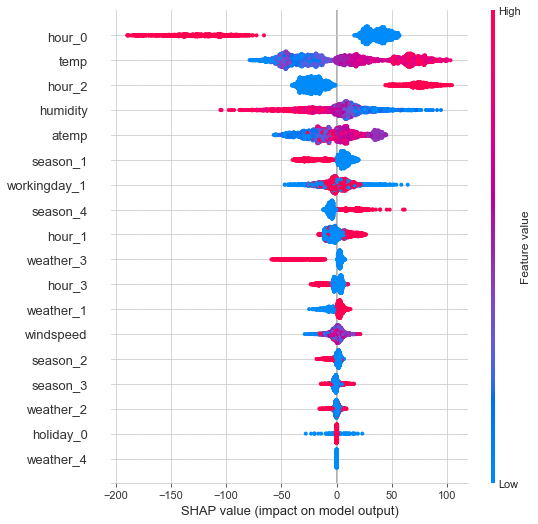

In [161]:
interpret_model(tuned_cb)